## VISUALIZATION ON SUMMARY DASHBOARD

## Index

#### Data Transformation
#### Data Exploration and Visualization

## Data Transformation

** Import data and libraries**

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

# Disable warnings
import warnings
warnings.simplefilter('ignore')

# Plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn library
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

#Importing the data
store_info = pd.read_csv(r'Downloads\store_info.csv',sep=';')
features = pd.read_csv(r'Downloads\features.csv',sep='|')
historic_sales = pd.read_csv(r'Downloads\historic_sales.csv',sep='|')

print('Data imported!')

Data imported!


**Merging the Data**

In [2]:
data = pd.merge(features, store_info, how='inner', on=['Store'])
data = pd.merge(historic_sales, data, how='inner', on=['Store','Date'])
data.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0', 'IsHoliday_y',], axis=1, inplace=True)
print('Merge Completed')

Merge Completed


**Tranforming date into year and month**

In [3]:
#Convert date into year and month
def right(variable, begin, end):
    return variable[begin-1:begin+end-1]

data['Year']=0
data['Month']=0
year=[]
month=[]
for i in data['Date']:
    year.append(right(i,1,4))
    month.append(right(i,6,2))

data['Year']=year
data['Month']=month

**Changing data types**

In [4]:
#Converting ',' to '.'
data['Weekly_Sales']=data.apply(lambda x: data['Weekly_Sales'].str.replace(',','.'))
#Changing Data Types
data['Weekly_Sales'] = pd.to_numeric(data.Weekly_Sales, errors='coerce')
data['Dept']=data['Dept'].astype('int64')
data['Year']=data['Year'].astype('int64')
data['Month']=data['Month'].astype('int64')
print('Data Types Changed')

Data Types Changed


## Data Exploration and Visualization

**Weekly Sales**

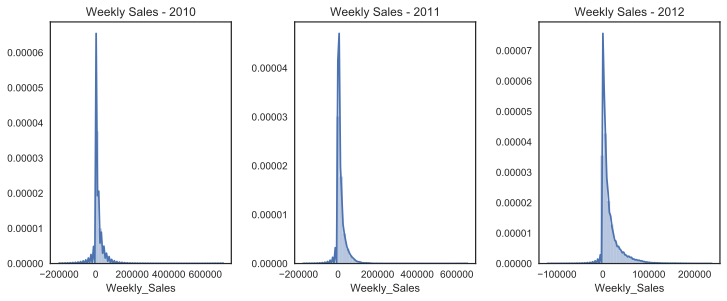

Year
2010    2.257981e+09
2011    2.414878e+09
2012    1.974163e+09
Name: Weekly_Sales, dtype: float64

In [5]:
warnings.filterwarnings(action='ignore')
plt.figure(figsize=[12,10])

plt.subplot(231)
sns.distplot(data[data['Year']==2010].Weekly_Sales.dropna())
plt.title('Weekly Sales - 2010')

plt.subplot(232)
sns.distplot(data[data['Year']==2011].Weekly_Sales.dropna())
plt.title('Weekly Sales - 2011')

plt.subplot(233)
sns.distplot(data[data['Year']==2012].Weekly_Sales.dropna())
plt.title('Weekly Sales - 2012')

plt.subplots_adjust(hspace=0.25,wspace=0.35)
plt.show()

data.groupby(['Year'])['Weekly_Sales'].sum()

**COMMENTS:**
- There is sales below 0, which don't make too much sense.
- It's possibe to see the was a small increase on the sales between 2010 and 2011, but contrary a decrease between 2012 and 2011.

**Summary Dashboard**

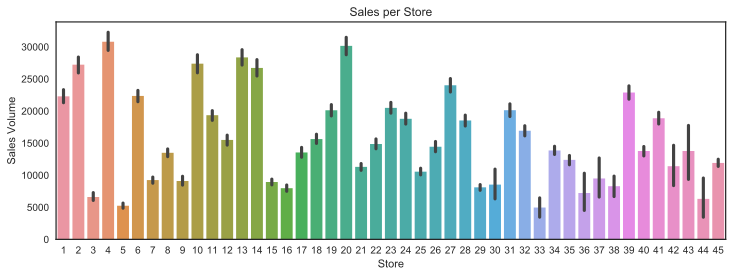

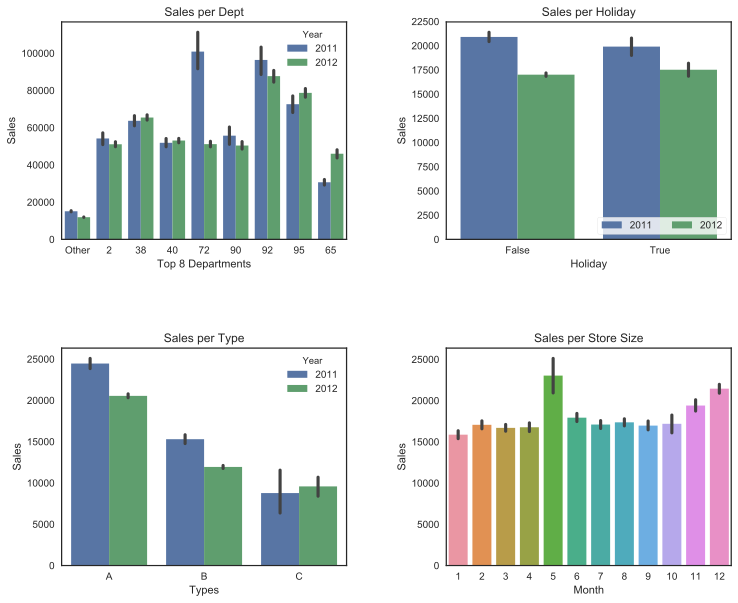

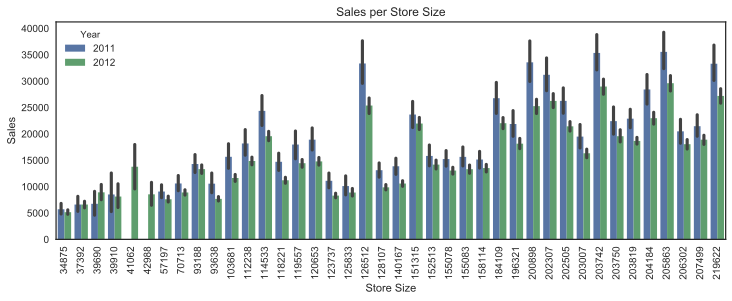

In [52]:
#Store
plt.figure(figsize=[12,4])
sns.barplot('Store','Weekly_Sales',data=data.dropna())
plt.title('Sales per Store')
plt.ylabel('Sales Volume')
plt.show()
# data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=True)

# data['Dept_top']=0
# top=[]
# for i in data['Dept']:
#     if i in [2,38,40,65,72,90,92,95]:
#         top.append(i)
#     else:
#         top.append('Other')
# data['Dept_top']=top

plt.figure(figsize=[12,10])

#Dept
plt.subplot(221)
sns.barplot('Dept_top','Weekly_Sales',hue='Year',data=data.dropna())
plt.xlabel('Top 8 Departments')
plt.ylabel('Sales')
plt.title('Sales per Dept')

#Holiday
plt.subplot(222)
sns.barplot('IsHoliday_x','Weekly_Sales',hue='Year',data=data.dropna())
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.title('Sales per Holiday')
plt.legend(ncol=2, loc='lower right', frameon=True)

#Type
plt.subplot(223)
sns.barplot('Type','Weekly_Sales',hue='Year',data=data.dropna())
plt.xlabel('Types')
plt.ylabel('Sales')
plt.title('Sales per Type')

plt.subplot(224)
sns.barplot('Month','Weekly_Sales',data=data.dropna())
plt.ylabel('Sales')
plt.title('Sales per Store Size')

plt.subplots_adjust(hspace=0.50, wspace=0.35)
plt.show()

# Store Size
plt.figure(figsize=[12,4])
sns.barplot('Size','Weekly_Sales',hue='Year',data=data.dropna())
plt.xticks(rotation=90)
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.title('Sales per Store Size')
plt.show()

**COMMENTS:**

- **Sales per Store**
    - The TOP 5 stores are stores number: 5,10,13,14,20
    - The BOTTOM 5 stores are stores number: 5,33,36,38,44
    
    
- **Sales per Dept** 
    - 8 departments together have more sales volume than the remaining 91. Clearly the economical rule of 80/20;
    - The volume decrease on 2012 was more felt on the dept 72 with values falling for half. Yet, dept 38 and 95 better performance;
    - No information for 2010 (data.loc[data['Year']==2010,['Debt','Year']])
    
    
- **Holiday**
    - No major diference on Sales for this variable. Higher volume for holidays on 2012.
    
    
- **Type**
    -  Stores with type A, regardless the year, are the ones with higher sales volume


- **Month**
    - May, November and December are the months with higher spending from the clients. Probably related with the beggining of vacations and summer for May, and Christmas for November and December
    

- **Store Size**
    - Its possible to see that the bigger the Store Size the higher the Sales Volume
    - Major importance for the size 126512, that being on the midlle table, presents very good results

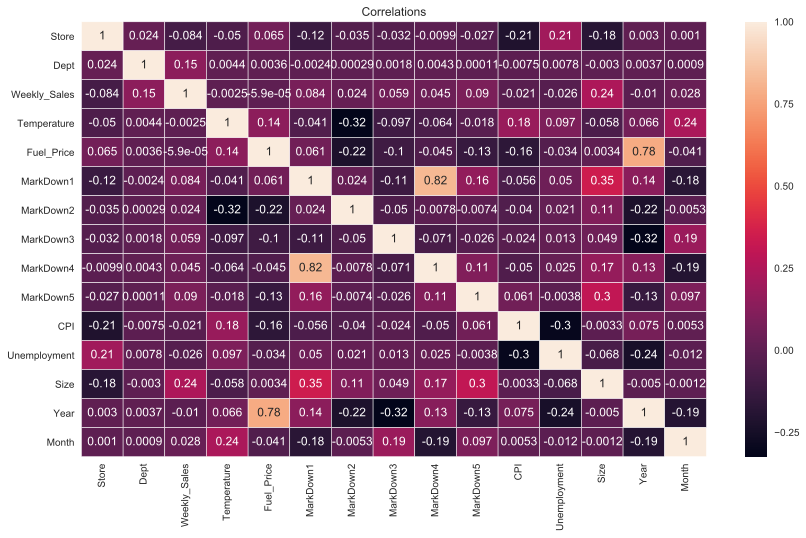

In [58]:
fig=plt.figure(figsize=(14,8),)
sns.heatmap(data.corr(),annot=True, linewidths=.5)
plt.title('Correlations')
plt.show()

**COMMENTS:**
- The higher correlations are between:
    - Store  - CPI
    - Store - Unemployment
    - Weekly Sales - Size
    - Temperature - Markdown2
    - Temperature - Month
    - Fuel price - Markdown2
    - Fuel Price - Year
    - Markdown 1 - Markdown 4
    - Markdown 1 - Size


**This correlations are important to provide info about associations between features. This association can also help understanding the sales volume when measuring it against other variable but also the direction of that specific relation.**

**STATISTICAL DESCRIPTION OF QUANTITATIVE VARIABLES**

In [67]:
data.loc[:,['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5', 
           'CPI', 'Unemployment']].describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421569.000000,421569.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421569.000000,421569.000000
mean,60.090071,3.361025,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201859,7.960290
std,18.447951,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159280,1.863298
min,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [65]:
data.loc[(data['Weekly_Sales']>0)&(data['Weekly_Sales']<20138)
         ,['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5', 
           'CPI', 'Unemployment']].describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,311329.000000,311329.000000,110811.000000,80350.000000,99721.000000,97508.000000,111457.000000,311329.000000,311329.000000
mean,60.039379,3.359438,6886.678603,3181.639867,1229.378437,3241.666375,4347.605627,171.865159,7.983517
std,18.558795,0.459067,8168.406968,8927.890003,8659.427473,6187.253554,5626.766152,39.184596,1.867888
min,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,46.650000,2.931000,1895.300000,36.600000,4.500000,477.960000,1707.050000,132.152129,6.877000
50%,62.010000,3.452000,4971.230000,190.700000,21.510000,1361.600000,3136.960000,183.180096,7.866000
75%,74.280000,3.735000,8790.270000,1943.200000,94.050000,3363.540000,5325.580000,212.845337,8.622000
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


**COMMENTS:**
- No major differente between the most common sales volume and the min & max sales volume
- Temperature assuming very akward values

**Temperature**

In [68]:
sns.jointplot(x='Temperature', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS:**
- Taken into consideration the temperature data, the sales tend to grow with temperatures between 30 and 60.

**Fuel_Price**

In [ ]:
sns.jointplot(x='Fuel_Price', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS:**
- Not very huge causal relationship between fuel_price and sales. Yet, the plot presents some higher values with when Fuel price is lower.

**Markdown 1 - 2 - 4 - 5**

In [ ]:
sns.jointplot(x='MarkDown1', y='Weekly_Sales', data=data.dropna())
plt.show()

sns.jointplot(x='MarkDown2', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS:**
- The lower the markdown the higher the sales volume

**Markdown 3**

In [ ]:
sns.jointplot(x='MarkDown3', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS**
- Different from the previous Markdowns,here we can see contrary curve where the bigger the value of Markdown the higher were the sales. 

**CPI**

In [ ]:
sns.jointplot(x='CPI', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS**
- The sales occurr essentually when the CPI was fixed on values between [0-140] & [190-220].
- The group with higher volume is placed in the CPI of [190-220], yet the group with higher sales price was with very low CPI (from 0 to 120)

**Unemployment**

In [ ]:
sns.jointplot(x='Unemployment', y='Weekly_Sales', data=data.dropna())
plt.show()

**COMMENTS:**
- It seems not to exist a direct relation between sales and unemployment as also suggested in the correlations map.